In [51]:
# ! pip3 install --user pandas
# ! pip3 install --user numpy
# ! pip3 install --user seaborn
# ! pip3 install --user matplotlib==3.1.3
# ! pip3 install --user plotly

Load color analysis results into a single dataset.

In [52]:
import os
from os.path import join
from glob import glob
import csv

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

images = glob('../data_sm/*.JPG')
print("Input images:", len(images))

results = glob('../output_sm/*.csv')
print("Result files:", len(results))

headers = []
rows = []
for result in results:
    with open(result, 'r') as file:
        reader = csv.reader(file)
        if len(headers) == 0: headers = next(reader, None)
        else: next(reader, None)
        for row in reader: rows.append(row)

df = pd.DataFrame(rows, columns=headers)
print(df)

Input images: 10
Result files: 10
                        Image Plant      Hex                    R  \
0     1_14_19.CalMag.5V4B3117     0  #8f6d4a   0.5607843137254902   
1     1_14_19.CalMag.5V4B3117     0  #7c4239  0.48627450980392156   
2     1_14_19.CalMag.5V4B3117     0  #75612e   0.4588235294117647   
3     1_14_19.CalMag.5V4B3117     0  #84593e   0.5176470588235295   
4     1_14_19.CalMag.5V4B3117     0  #a38d67   0.6392156862745098   
..                        ...   ...      ...                  ...   
531  1_14_19.Control.5V4B3115     5  #7e6b46  0.49411764705882355   
532  1_14_19.Control.5V4B3115     5  #5d5d4b  0.36470588235294116   
533  1_14_19.Control.5V4B3115     5  #6c593e   0.4235294117647059   
534  1_14_19.Control.5V4B3115     5  #604d33   0.3764705882352941   
535  1_14_19.Control.5V4B3115     5  #72562f   0.4470588235294118   

                       G                    B    Freq  
0    0.42745098039215684   0.2901960784313726  189627  
1    0.25882352941176473 

Extract treatment from image name.

In [53]:
df['Treatment'] = df.apply(lambda row: 'Control' if 'Control' in row['Image'] else ('MaxSea' if 'MaxSea' in row['Image'] else ('CalMag' if 'CalMag' in row['Image'] else np.NaN)), axis=1)
print(df)

                        Image Plant      Hex                    R  \
0     1_14_19.CalMag.5V4B3117     0  #8f6d4a   0.5607843137254902   
1     1_14_19.CalMag.5V4B3117     0  #7c4239  0.48627450980392156   
2     1_14_19.CalMag.5V4B3117     0  #75612e   0.4588235294117647   
3     1_14_19.CalMag.5V4B3117     0  #84593e   0.5176470588235295   
4     1_14_19.CalMag.5V4B3117     0  #a38d67   0.6392156862745098   
..                        ...   ...      ...                  ...   
531  1_14_19.Control.5V4B3115     5  #7e6b46  0.49411764705882355   
532  1_14_19.Control.5V4B3115     5  #5d5d4b  0.36470588235294116   
533  1_14_19.Control.5V4B3115     5  #6c593e   0.4235294117647059   
534  1_14_19.Control.5V4B3115     5  #604d33   0.3764705882352941   
535  1_14_19.Control.5V4B3115     5  #72562f   0.4470588235294118   

                       G                    B    Freq Treatment  
0    0.42745098039215684   0.2901960784313726  189627    CalMag  
1    0.25882352941176473   0.2235294117

Drop rows with unknown treatment (TODO: ask Mason about unlabeled images).

In [54]:
df.dropna(how='any', inplace=True)
print(df)

                        Image Plant      Hex                    R  \
0     1_14_19.CalMag.5V4B3117     0  #8f6d4a   0.5607843137254902   
1     1_14_19.CalMag.5V4B3117     0  #7c4239  0.48627450980392156   
2     1_14_19.CalMag.5V4B3117     0  #75612e   0.4588235294117647   
3     1_14_19.CalMag.5V4B3117     0  #84593e   0.5176470588235295   
4     1_14_19.CalMag.5V4B3117     0  #a38d67   0.6392156862745098   
..                        ...   ...      ...                  ...   
531  1_14_19.Control.5V4B3115     5  #7e6b46  0.49411764705882355   
532  1_14_19.Control.5V4B3115     5  #5d5d4b  0.36470588235294116   
533  1_14_19.Control.5V4B3115     5  #6c593e   0.4235294117647059   
534  1_14_19.Control.5V4B3115     5  #604d33   0.3764705882352941   
535  1_14_19.Control.5V4B3115     5  #72562f   0.4470588235294118   

                       G                    B    Freq Treatment  
0    0.42745098039215684   0.2901960784313726  189627    CalMag  
1    0.25882352941176473   0.2235294117

Add columns for HSV color representation.

In [55]:
from colorsys import rgb_to_hsv

def to_hsv(row):
    hsv = rgb_to_hsv(float(row['R']), float(row['G']), float(row['B']))
    return [hsv[0], hsv[1], hsv[2]]

df['H'], df['S'], df['V'] = zip(*df.apply(lambda row: to_hsv(row), axis=1))
print(df)

                        Image Plant      Hex                    R  \
0     1_14_19.CalMag.5V4B3117     0  #8f6d4a   0.5607843137254902   
1     1_14_19.CalMag.5V4B3117     0  #7c4239  0.48627450980392156   
2     1_14_19.CalMag.5V4B3117     0  #75612e   0.4588235294117647   
3     1_14_19.CalMag.5V4B3117     0  #84593e   0.5176470588235295   
4     1_14_19.CalMag.5V4B3117     0  #a38d67   0.6392156862745098   
..                        ...   ...      ...                  ...   
531  1_14_19.Control.5V4B3115     5  #7e6b46  0.49411764705882355   
532  1_14_19.Control.5V4B3115     5  #5d5d4b  0.36470588235294116   
533  1_14_19.Control.5V4B3115     5  #6c593e   0.4235294117647059   
534  1_14_19.Control.5V4B3115     5  #604d33   0.3764705882352941   
535  1_14_19.Control.5V4B3115     5  #72562f   0.4470588235294118   

                       G                    B    Freq Treatment         H  \
0    0.42745098039215684   0.2901960784313726  189627    CalMag  0.084541   
1    0.2588235294

Next, RGB-space k-means clustering for each treatment.

CalMag: 159
{(67, 62, 39): 0.06302521008403361,
 (78, 85, 24): 0.04201680672268908,
 (89, 69, 47): 0.04201680672268908,
 (93, 107, 32): 0.029411764705882353,
 (94, 56, 74): 0.04201680672268908,
 (96, 83, 64): 0.06302521008403361,
 (100, 95, 77): 0.04201680672268908,
 (104, 78, 50): 0.08403361344537816,
 (108, 114, 67): 0.04201680672268908,
 (117, 96, 72): 0.025210084033613446,
 (119, 110, 73): 0.029411764705882353,
 (119, 127, 48): 0.029411764705882353,
 (121, 87, 61): 0.029411764705882353,
 (124, 93, 43): 0.03361344537815126,
 (127, 114, 94): 0.08403361344537816,
 (128, 103, 76): 0.004201680672268907,
 (128, 138, 92): 0.04201680672268908,
 (130, 72, 47): 0.03361344537815126,
 (137, 95, 93): 0.03361344537815126,
 (145, 121, 93): 0.03361344537815126,
 (148, 112, 73): 0.04201680672268908,
 (154, 150, 78): 0.029411764705882353,
 (166, 138, 103): 0.029411764705882353,
 (166, 149, 131): 0.04201680672268908,
 (193, 182, 158): 0.029411764705882353}


/Users/wes/dev/pytcher-plants/venv/lib/python3.8/site-packages/scipy/cluster/vq.py:607: UserWarning:

One of the clusters is empty. Re-run kmeans with a different initialization.



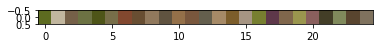

['rgb(93, 107, 32)', 'rgb(193, 182, 158)', 'rgb(117, 96, 72)', 'rgb(108, 114, 67)', 'rgb(78, 85, 24)', 'rgb(119, 110, 73)', 'rgb(130, 72, 47)', 'rgb(104, 78, 50)', 'rgb(145, 121, 93)', 'rgb(96, 83, 64)', 'rgb(148, 112, 73)', 'rgb(121, 87, 61)', 'rgb(100, 95, 77)', 'rgb(166, 138, 103)', 'rgb(124, 93, 43)', 'rgb(166, 149, 131)', 'rgb(119, 127, 48)', 'rgb(94, 56, 74)', 'rgb(128, 103, 76)', 'rgb(154, 150, 78)', 'rgb(137, 95, 93)', 'rgb(67, 62, 39)', 'rgb(128, 138, 92)', 'rgb(89, 69, 47)', 'rgb(127, 114, 94)']


Control: 215
{(63, 30, 11): 0.009523809523809525,
 (65, 80, 103): 0.06031746031746032,
 (72, 71, 49): 0.04126984126984127,
 (74, 46, 20): 0.0380952380952381,
 (82, 80, 59): 0.06031746031746032,
 (83, 108, 141): 0.0380952380952381,
 (84, 81, 28): 0.0380952380952381,
 (91, 72, 47): 0.06031746031746032,
 (102, 103, 38): 0.0380952380952381,
 (104, 92, 69): 0.012698412698412698,
 (105, 73, 39): 0.04126984126984127,
 (112, 57, 23): 0.047619047619047616,
 (113, 126, 85): 0.047619047619047616,
 (119, 88, 47): 0.047619047619047616,
 (125, 75, 39): 0.01904761904761905,
 (126, 112, 85): 0.07301587301587302,
 (127, 97, 61): 0.012698412698412698,
 (131, 60, 52): 0.047619047619047616,
 (146, 86, 48): 0.0380952380952381,
 (149, 80, 72): 0.009523809523809525,
 (149, 113, 72): 0.04126984126984127,
 (157, 130, 91): 0.047619047619047616,
 (166, 102, 79): 0.047619047619047616,
 (173, 144, 114): 0.04126984126984127,
 (204, 178, 149): 0.04126984126984127}


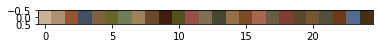

['rgb(204, 178, 149)', 'rgb(173, 144, 114)', 'rgb(146, 86, 48)', 'rgb(65, 80, 103)', 'rgb(127, 97, 61)', 'rgb(102, 103, 38)', 'rgb(113, 126, 85)', 'rgb(157, 130, 91)', 'rgb(105, 73, 39)', 'rgb(63, 30, 11)', 'rgb(84, 81, 28)', 'rgb(149, 80, 72)', 'rgb(126, 112, 85)', 'rgb(72, 71, 49)', 'rgb(149, 113, 72)', 'rgb(125, 75, 39)', 'rgb(166, 102, 79)', 'rgb(104, 92, 69)', 'rgb(131, 60, 52)', 'rgb(91, 72, 47)', 'rgb(119, 88, 47)', 'rgb(82, 80, 59)', 'rgb(112, 57, 23)', 'rgb(83, 108, 141)', 'rgb(74, 46, 20)']


MaxSea: 162
{(58, 39, 5): 0.05128205128205128,
 (80, 79, 64): 0.05128205128205128,
 (85, 79, 31): 0.02564102564102564,
 (94, 108, 51): 0.046153846153846156,
 (104, 72, 43): 0.010256410256410256,
 (109, 102, 38): 0.06666666666666667,
 (115, 78, 36): 0.020512820512820513,
 (121, 88, 66): 0.041025641025641026,
 (128, 72, 44): 0.046153846153846156,
 (133, 109, 82): 0.046153846153846156,
 (137, 126, 50): 0.05128205128205128,
 (139, 58, 32): 0.046153846153846156,
 (139, 101, 59): 0.015384615384615385,
 (146, 76, 48): 0.046153846153846156,
 (162, 99, 62): 0.041025641025641026,
 (162, 126, 96): 0.035897435897435895,
 (168, 67, 59): 0.06666666666666667,
 (171, 109, 73): 0.015384615384615385,
 (173, 130, 86): 0.046153846153846156,
 (180, 156, 82): 0.020512820512820513,
 (190, 135, 98): 0.041025641025641026,
 (198, 155, 115): 0.05128205128205128,
 (208, 187, 124): 0.07179487179487179,
 (229, 194, 156): 0.020512820512820513,
 (232, 146, 134): 0.02564102564102564}


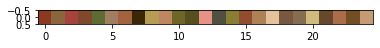

['rgb(139, 58, 32)', 'rgb(139, 101, 59)', 'rgb(168, 67, 59)', 'rgb(128, 72, 44)', 'rgb(94, 108, 51)', 'rgb(162, 126, 96)', 'rgb(162, 99, 62)', 'rgb(58, 39, 5)', 'rgb(180, 156, 82)', 'rgb(190, 135, 98)', 'rgb(109, 102, 38)', 'rgb(85, 79, 31)', 'rgb(232, 146, 134)', 'rgb(80, 79, 64)', 'rgb(137, 126, 50)', 'rgb(146, 76, 48)', 'rgb(173, 130, 86)', 'rgb(229, 194, 156)', 'rgb(121, 88, 66)', 'rgb(133, 109, 82)', 'rgb(208, 187, 124)', 'rgb(104, 72, 43)', 'rgb(171, 109, 73)', 'rgb(115, 78, 36)', 'rgb(198, 155, 115)']


In [70]:
from pprint import pprint
from collections import Counter

from scipy.cluster.vq import kmeans, kmeans2
import plotly.graph_objects as go

treatments = list(np.unique(df['Treatment']))
for treatment in treatments:
    # get subset corresponding to this treatment
    subset = df[df['Treatment'] == treatment]
    print(treatment + ":", len(subset))

    colors = dict()
    subset_rgb = subset[['R', 'G', 'B']].astype(float).values.tolist()
    centers, labels = kmeans2(subset_rgb, 25)
    counter = dict(Counter(labels))
    counts = {(int(float(c[0]) * 256), int(float(c[1]) * 256), int(float(c[2]) * 256)): counter[l] for c, l in zip(centers, labels)}
    total = sum(counts.values())
    props = {k: (v / total) for k, v in counts.items()}
    pprint(props)

    plt.imshow([list(props.keys())])
    plt.show()

    fig = go.Figure()
    r = [k[0] for k in props.keys()]
    g = [k[1] for k in props.keys()]
    b = [k[2] for k in props.keys()]
    colors_map = [f'rgb({c[0]}, {c[1]}, {c[2]})' for c in props.keys()]
    sizes_map = list([v * 1000 for v in props.values()])
    print(colors_map)
    trace=dict(type='scatter3d',
               x=r,
               y=g,
               z=b,
               mode='markers',
               marker=dict(color=colors_map, size=sizes_map))
    fig.add_trace(trace)
    fig.update_layout(title=treatment, scene=dict(
        xaxis_title='G',
        yaxis_title='R',
        zaxis_title='B'))
    fig.show()
    
    # colors = subset.loc[:, ['R', 'G', 'B', 'Freq']].head(100)
    # colors['R'] = colors['R'].astype(float) * 256
    # colors['G'] = colors['G'].astype(float) * 256
    # colors['B'] = colors['B'].astype(float) * 256
    # colors['Freq'] = colors['Freq'].astype(int)
    # print(colors)

    # fig = go.Figure()
    # colors_map = [f'rgb({c[0]}, {c[1]}, {c[2]})' for c in list(colors.apply(
    #     lambda r: (float(r['R']), float(r['G']), float(r['B'])), axis=1))]
    # sizes_map = [(int(f) / 2000) for f in list(colors['Freq'])]
    # trace=dict(type='scatter3d',
    #            x=colors['R'],
    #            y=colors['G'],
    #            z=colors['B'],
    #            mode='markers',
    #            marker=dict(color=colors_map, size=sizes_map))
    # fig.add_trace(trace)
    # fig.update_layout(title=treatment, scene=dict(
    #     xaxis_title='G',
    #     yaxis_title='R',
    #     zaxis_title='B'))
    # fig.show()

TODO: define a series of color slices (bins), compute proportions of each treatment falling into each bin

TODO: compute total pixel counts for each treatment as a proxy for pitcher size
(later try a real pitcher segmentation, but for now just make an overall count)